## Demonstrate simple x^2 function

In [1]:
from matplotlib import pyplot

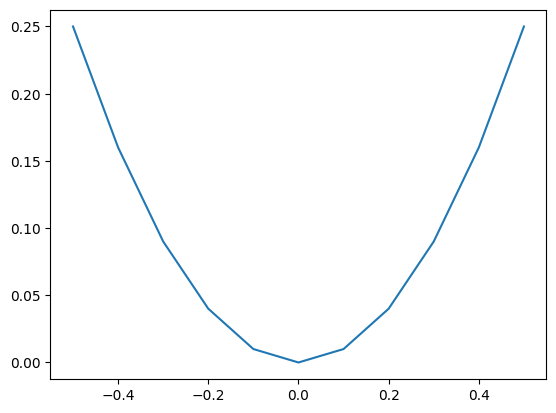

In [2]:


# simple function
def calculate(x):
 return x * x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

# example of generating random samples from X^2

In [3]:
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot

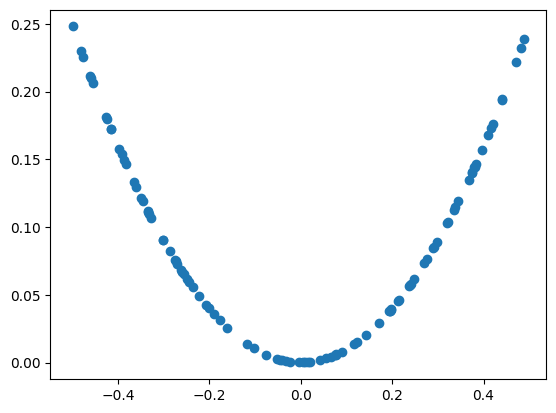

In [4]:
# generate randoms sample from x^2
def generate_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	return hstack((X1, X2))

# generate samples
data = generate_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

# define the discriminator model

In [5]:
# define and fit a discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


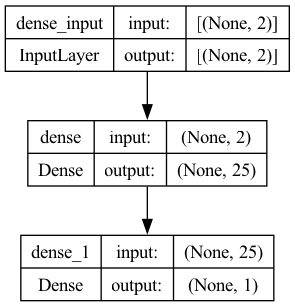

In [2]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [3]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [4]:
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

In [7]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

In [8]:
# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.9375 0.34375
1 0.96875 0.390625
2 0.953125 0.296875
3 0.9375 0.46875
4 0.921875 0.421875
5 0.875 0.4375
6 0.859375 0.40625
7 0.890625 0.484375
8 0.90625 0.40625
9 0.84375 0.421875
10 0.890625 0.46875
11 0.875 0.28125
12 0.765625 0.4375
13 0.796875 0.4375
14 0.765625 0.40625
15 0.796875 0.453125
16 0.703125 0.515625
17 0.84375 0.484375
18 0.796875 0.546875
19 0.71875 0.40625
20 0.78125 0.484375
21 0.734375 0.390625
22 0.6875 0.515625
23 0.6875 0.578125
24 0.703125 0.359375
25 0.71875 0.546875
26 0.71875 0.484375
27 0.6875 0.484375
28 0.6875 0.5
29 0.671875 0.46875
30 0.53125 0.4375
31 0.84375 0.515625
32 0.640625 0.453125
33 0.65625 0.484375
34 0.703125 0.65625
35 0.6875 0.59375
36 0.53125 0.578125
37 0.53125 0.640625
38 0.6875 0.53125
39 0.640625 0.46875
40 0.640625 0.421875
41 0.65625 0.640625
42 0.578125 0.53125
43 0.640625 0.578125
44 0.609375 0.46875
45 0.65625 0.53125
46 0.625 0.515625
47 0.5625 0.484375
48 0.625 0.609375
49 0.734375 0.53125
50 0.5625 0.546875
51 0.6875 0.5625